# Regularization

个人认为正则化可以从两个角度来看待(以线性回归为例)：
1. 防止过拟合，降低模型的复杂度，抑制参数的大小，让参数不会变得特别大，所以正则化也叫权重衰退。
2. 保证线性回归一定有解，在用最小二乘法计算时，可得到线性回归解析解为$(X^TX)^{-1}X^TY$，但有时候$X^TX$是不一定有逆的，也就是统计学中说的变量之间存在多重共线性。这时候有两种解决办法，一种是用奇异值分解直接计算伪逆$(X^TX)^{-1}X^T$，另外一种方法就是用L2正则化，也叫岭回归，这时解析解就变成了$(X^TX+\lambda I)^{-1}X^TY$，($\lambda>0$)，这个时候括号里面的逆一定是存在，因为$X^TX$本身是半正定的，它的所有特征值都$\geq 0$，加上$\lambda I后$，它的所有特征值就都大于0了，这时逆一定存在，即解一定存在。

下面举一个简单的多项式拟合例子来直观的看一下正则化。

In [2]:
#导入需要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [3]:
#生成sin函数在一个周期(0, 2π)内的数据
a = np.arange(0, 2*np.pi, 0.1)
y_sinx = np.sin(a)
#以0.6为间隔在(0, 6)范围内生成10个数
x = np.arange(0, 6, 0.6).reshape(10, -1)
#设置随机种子
np.random.seed(21)
#生成10个分布为N(0, 1)的随机数
epison = np.random.normal(0, 1, size=x.shape)
#生成真实值
y_true = np.sin(x) + epison

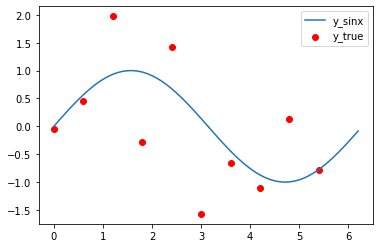

In [4]:
#绘制相应的正弦函数图像
plt.plot(a, y_sinx, label="y_sinx")
plt.scatter(x, y_true, label="y_true", color="r")
plt.legend()
plt.show()

In [5]:
#二次多项式
pipe = Pipeline([('feature', PolynomialFeatures(degree=2)),
                 ('lr', LinearRegression(fit_intercept=False))])
pipe.fit(x, y_true)
coef_2 = pipe['lr'].coef_
y_2 = pipe.predict(x)
#三次多项式
pipe = Pipeline([('feature', PolynomialFeatures(degree=3)),
                 ('lr', LinearRegression(fit_intercept=False))])
pipe.fit(x, y_true)
coef_3 = pipe['lr'].coef_
y_3 = pipe.predict(x)
#五次多项式
pipe = Pipeline([('feature', PolynomialFeatures(degree=5)),
                 ('lr', LinearRegression(fit_intercept=False))])

pipe.fit(x, y_true)
coef_5 = pipe['lr'].coef_
y_5 = pipe.predict(x)
#九次多项式
pipe = Pipeline([('feature', PolynomialFeatures(degree=9)),
                 ('lr', LinearRegression(fit_intercept=False))])

pipe.fit(x, y_true)
coef_9 = pipe['lr'].coef_
y_9 = pipe.predict(x)

d:\Anacodna\miniconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


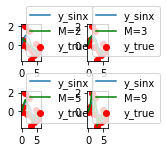

In [6]:
#绘制各多项式的图像
fig = plt.figure(figsize=(2, 2))
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.plot(a, y_sinx, label="y_sinx")
axes1.scatter(x, y_true, label="y_true", color="r")
axes1.plot(x, y_2, label="M=2", color="green")
axes1.legend()
axes2.plot(a, y_sinx, label="y_sinx")
axes2.scatter(x, y_true, label="y_true", color="r")
axes2.plot(x, y_3, label="M=3", color="green")
axes2.legend()
axes3.plot(a, y_sinx, label="y_sinx")
axes3.scatter(x, y_true, label="y_true", color="r")
axes3.plot(x, y_5, label="M=5", color="green")
axes3.legend()
axes4.plot(a, y_sinx, label="y_sinx")
axes4.scatter(x, y_true, label="y_true", color="r")
axes4.plot(x, y_9, label="M=9", color="green")
axes4.legend()
fig.tight_layout()
fig.show()
#图片可能显示的会有点问题，可以去文件夹下查看polynomial_demo.png这张图片

各多项式的系数如下所示(从左往右分别为截距项,一次项,二次项,三次项.......)：
二次：[ 0.66591124 -0.21063141 -0.01400257]
三次：[ 0.03583417  1.71043691 -0.95161726  0.1157549 ]
五次：[-0.0755096   0.57901471  2.07612953 -1.91503701  0.5010642  -0.04112775]
九次：[   -0.05196426  -200.64705615   850.19139651 -1393.68307158
   1191.92112093  -592.17435814   177.14908828   -31.44451888
      3.04931432    -0.12438003]
可以看出，随着多项式系数的增加，曲线对这10个样本点的拟合效果越来越好，但是当函数为九次多项式时这就是典型的过拟合，与之对应的系数也变得越来越大。
接下来看一下用采用L2正则化的九次多项式来拟合会发生什么样的变化。

In [7]:
#正则化系数为0.01
pipe = Pipeline([('feature', PolynomialFeatures(degree=9)),
                 ('ridge', Ridge(alpha=0.01, fit_intercept=False))])
pipe.fit(x, y_true)
l2_coef_9 = pipe['ridge'].coef_
y_9 = pipe.predict(x)
#设置不用科学计数法输出
np.set_printoptions(suppress=True)
print(l2_coef_9)

[[-0.09067004  1.2009269   0.82357157 -0.6812892  -0.4874632   0.51919894
  -0.18135886  0.03029436 -0.00224941  0.00004445]]


可以看到即使我们用了一个比较小的正则化系数0.01，相应的系数也被极大的压缩了，这也是正则化被称为权重衰退的原因，从而避免了过拟合。

使用L1正则化的线性回归叫Lasso回归，由于它可以使某些系数变为0，所以可以起到一定的特征选择作用。使用L1+L2正则化的线性回归叫弹性网回归(ElasticNet)。

在使用正则化的过程中，最重要的就是正则化系数的选取，过大或过小都会导致模型效果变坏，针对如何选取合适的正则化系数，可以采用交叉验证的方法，在sklearn中有相应的方法可以直接使用(RidgeCV、LassoCV等)，大家可以自行尝试。